In [103]:
%pip install gurobipy
import numpy as np
from gurobipy import *
from random import sample

In [104]:
#Data
num_pairs=200
num_altruists=10
num_patients = num_pairs
num_donors = num_altruists+num_pairs
k=2 #Max_Matchs

In [105]:
#Data, synthezing the datasets
#patient list
P = [i for i in range(1,num_patients+1)]
#donors list
D = [i for i in range(1,num_donors+1)]
#patient:Number of Matchs
Matchs_count = {int(key+1):int(np.random.randint(1,k+1)) for key in range(num_patients)}
#patient:Match_on_donor_list
Match_on_donor = {int(key+1):sample(D,Matchs_count[int(key+1)]) for key in range(num_patients)}
#patient,donor:Percentage
Match_donor_Percentage = {(int(key+1),i): np.random.randint(1,100) for key in range(num_patients) for i in Match_on_donor[(key+1)]}

In [106]:
Matchs_count

{1: 2,
 2: 1,
 3: 2,
 4: 1,
 5: 1,
 6: 1,
 7: 2,
 8: 2,
 9: 1,
 10: 2,
 11: 1,
 12: 2,
 13: 1,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 2,
 25: 1,
 26: 1,
 27: 2,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 2,
 34: 2,
 35: 2,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 2,
 43: 1,
 44: 1,
 45: 2,
 46: 2,
 47: 1,
 48: 1,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 1,
 55: 2,
 56: 1,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 1,
 63: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 1,
 68: 2,
 69: 2,
 70: 1,
 71: 2,
 72: 1,
 73: 2,
 74: 2,
 75: 2,
 76: 1,
 77: 1,
 78: 2,
 79: 1,
 80: 1,
 81: 2,
 82: 1,
 83: 2,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 1,
 94: 2,
 95: 1,
 96: 1,
 97: 1,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 102: 1,
 103: 2,
 104: 2,
 105: 1,
 106: 2,
 107: 2,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 2,
 114: 1,
 115: 1,
 116: 2,
 117: 1,
 118: 2,
 119: 1,
 120: 2,
 121: 1,
 122: 1,
 123: 2,
 

In [107]:
Match_on_donor

{1: [7, 172],
 2: [2],
 3: [24, 156],
 4: [138],
 5: [96],
 6: [60],
 7: [92, 167],
 8: [139, 119],
 9: [80],
 10: [102, 93],
 11: [124],
 12: [87, 200],
 13: [70],
 14: [19, 190],
 15: [9, 108],
 16: [187, 97],
 17: [92, 123],
 18: [18],
 19: [42],
 20: [127],
 21: [50],
 22: [147],
 23: [203],
 24: [201, 177],
 25: [123],
 26: [163],
 27: [46, 61],
 28: [158],
 29: [13],
 30: [55],
 31: [125],
 32: [176],
 33: [109, 210],
 34: [182, 137],
 35: [147, 168],
 36: [103],
 37: [127],
 38: [142],
 39: [3],
 40: [187],
 41: [82],
 42: [63, 179],
 43: [135],
 44: [14],
 45: [157, 126],
 46: [58, 117],
 47: [7],
 48: [183],
 49: [140, 37],
 50: [71, 60],
 51: [43, 208],
 52: [139, 137],
 53: [96, 163],
 54: [48],
 55: [99, 155],
 56: [197],
 57: [147, 127],
 58: [90, 186],
 59: [37, 77],
 60: [42, 151],
 61: [104, 36],
 62: [105],
 63: [179, 138],
 64: [210, 38],
 65: [52, 1],
 66: [60, 163],
 67: [4],
 68: [199, 139],
 69: [197, 85],
 70: [189],
 71: [154, 201],
 72: [54],
 73: [35, 198],
 7

In [108]:
Match_donor_Percentage

{(1, 7): 69,
 (1, 172): 87,
 (2, 2): 96,
 (3, 24): 86,
 (3, 156): 84,
 (4, 138): 92,
 (5, 96): 13,
 (6, 60): 83,
 (7, 92): 19,
 (7, 167): 54,
 (8, 119): 79,
 (8, 139): 35,
 (9, 80): 38,
 (10, 93): 94,
 (10, 102): 2,
 (11, 124): 41,
 (12, 87): 37,
 (12, 200): 16,
 (13, 70): 66,
 (14, 19): 48,
 (14, 190): 64,
 (15, 9): 80,
 (15, 108): 84,
 (16, 97): 10,
 (16, 187): 45,
 (17, 92): 88,
 (17, 123): 83,
 (18, 18): 8,
 (19, 42): 99,
 (20, 127): 68,
 (21, 50): 84,
 (22, 147): 67,
 (23, 203): 28,
 (24, 177): 50,
 (24, 201): 27,
 (25, 123): 21,
 (26, 163): 22,
 (27, 46): 22,
 (27, 61): 49,
 (28, 158): 4,
 (29, 13): 60,
 (30, 55): 60,
 (31, 125): 66,
 (32, 176): 99,
 (33, 109): 30,
 (33, 210): 33,
 (34, 137): 13,
 (34, 182): 56,
 (35, 147): 40,
 (35, 168): 43,
 (36, 103): 62,
 (37, 127): 35,
 (38, 142): 40,
 (39, 3): 46,
 (40, 187): 24,
 (41, 82): 70,
 (42, 63): 69,
 (42, 179): 91,
 (43, 135): 45,
 (44, 14): 86,
 (45, 126): 97,
 (45, 157): 49,
 (46, 58): 50,
 (46, 117): 61,
 (47, 7): 90,
 (48, 18

In [109]:
model = Model()
#Variable x which says patient to donor matched(1) or not(0)
#This also allocates 1's and 0's based on Match_on_donor instead of entire donor list
x=model.addVars([(i,j) for i in P for j in Match_on_donor[i]],vtype=GRB.INTEGER,name='x')
#Constraint to limit only one donor per patient
c1=model.addConstrs(quicksum(x[i,j] for i in P if j in Match_on_donor[i]) <= 1 for j in D )
#Constraint to limit only one patient per donor
c2=model.addConstrs(quicksum(x[i,j] for j in Match_on_donor[i]) <= 1 for i in P)
#Constraint to setup donor i should give only when patient i is recieving a organ
#c3=model.addConstrs(x[i,j]==1 if x[j,i]=1 for in D i==j for j in P)

In [110]:
model.setObjective(quicksum(x[i,j]*Match_donor_Percentage[(i,j)] for i in P for j in Match_on_donor[i] ),GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 410 rows, 294 columns and 588 nonzeros
Model fingerprint: 0x5e1a74f7
Variable types: 0 continuous, 294 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6783.0000000
Presolve removed 410 rows and 294 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 9031 6783 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.031000000000e+03, best bound 9.031000000000e+03, gap 0.0000%


In [111]:
count=0
matches=[]
for v in model.getVars():
      if v.X > 0:
        print(v.varName,v.X)
        matches.append(v.VarName)
        count=count+1
print(count)

x[1,172] 1.0
x[2,2] 1.0
x[3,24] 1.0
x[4,138] 1.0
x[5,96] 1.0
x[7,167] 1.0
x[9,80] 1.0
x[10,93] 1.0
x[11,124] 1.0
x[12,200] 1.0
x[13,70] 1.0
x[14,190] 1.0
x[15,108] 1.0
x[16,187] 1.0
x[17,92] 1.0
x[19,42] 1.0
x[23,203] 1.0
x[24,177] 1.0
x[25,123] 1.0
x[28,158] 1.0
x[30,55] 1.0
x[31,125] 1.0
x[32,176] 1.0
x[33,109] 1.0
x[35,168] 1.0
x[36,103] 1.0
x[38,142] 1.0
x[41,82] 1.0
x[42,63] 1.0
x[43,135] 1.0
x[44,14] 1.0
x[45,126] 1.0
x[46,117] 1.0
x[47,7] 1.0
x[49,140] 1.0
x[51,208] 1.0
x[52,139] 1.0
x[53,163] 1.0
x[54,48] 1.0
x[55,99] 1.0
x[57,147] 1.0
x[58,186] 1.0
x[59,37] 1.0
x[61,104] 1.0
x[62,105] 1.0
x[63,179] 1.0
x[64,38] 1.0
x[65,1] 1.0
x[66,60] 1.0
x[67,4] 1.0
x[68,199] 1.0
x[69,197] 1.0
x[71,201] 1.0
x[72,54] 1.0
x[75,13] 1.0
x[76,210] 1.0
x[78,191] 1.0
x[80,178] 1.0
x[81,61] 1.0
x[83,133] 1.0
x[84,110] 1.0
x[85,114] 1.0
x[89,77] 1.0
x[90,155] 1.0
x[91,202] 1.0
x[92,153] 1.0
x[93,102] 1.0
x[94,66] 1.0
x[95,209] 1.0
x[96,150] 1.0
x[98,65] 1.0
x[99,115] 1.0
x[100,69] 1.0
x[101,71] 1.0
x

In [112]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [122]:
P_M=[]
D_M=[]
for i in range(len(matches)):
  split_match = matches[i][1:].split(',')

  P_M.append(int(split_match[0][1:]))
  D_M.append(int(split_match[1][:-1]))

In [132]:
D_M

[172,
 2,
 24,
 138,
 96,
 167,
 80,
 93,
 124,
 200,
 70,
 190,
 108,
 187,
 92,
 42,
 203,
 177,
 123,
 158,
 55,
 125,
 176,
 109,
 168,
 103,
 142,
 82,
 63,
 135,
 14,
 126,
 117,
 7,
 140,
 208,
 139,
 163,
 48,
 99,
 147,
 186,
 37,
 104,
 105,
 179,
 38,
 1,
 60,
 4,
 199,
 197,
 201,
 54,
 13,
 210,
 191,
 178,
 61,
 133,
 110,
 114,
 77,
 155,
 202,
 153,
 102,
 66,
 209,
 150,
 65,
 115,
 69,
 71,
 162,
 180,
 79,
 49,
 33,
 119,
 182,
 57,
 6,
 130,
 87,
 18,
 53,
 165,
 74,
 118,
 194,
 88,
 83,
 161,
 151,
 127,
 45,
 52,
 12,
 146,
 91,
 141,
 59,
 183,
 122,
 20,
 30,
 39,
 8,
 100,
 184,
 86,
 35,
 132,
 5,
 101,
 51,
 85,
 170,
 171,
 198,
 81,
 193,
 89,
 189,
 206,
 16,
 34,
 173,
 157,
 19,
 195,
 156,
 68,
 36,
 90,
 128,
 111,
 31,
 154,
 120,
 107,
 58,
 3,
 46,
 50,
 9,
 137]

In [135]:
G = nx.Graph()
G.add_nodes_from(P, bipartite=0)
G.add_nodes_from(D,bipartite=1)
G.add_edges_from([('1',"172"),('2',"2"),('3',"24"),('4',"138"),('5',"96"),('7',"167"),('9',"80"),('10',"93"),('11',"124"),('12',"200"),('13',"70"),('14',"190"),('15',"108"),('16',"187"),('17',"92"),('19',"42"),('23',"203"),('24',"177"),('25',"123"),('28',"158"),('30',"55"),('31',"125"),('32',"176"),('33',"109"),('35',"168"),('36',"103"),('38',"142"),('41',"82"),('42',"63"),('43',"135"),('44',"14"),('45',"126"),('46',"117"),('47',"7"),('49',"140"),('51',"208"),('52',"139"),('53',"163"),('54',"48"),('55',"99"),('57',"147"),('58',"186"),('59',"37"),('61',"104"),('62',"105"),('63',"179"),('64',"38"),('65',"1"),('66',"60"),('67',"4"),('68',"199"),('69',"197"),('71',"201"),('72',"54"),('75',"13"),('76',"210"),('78',"191"),('80',"178"),('81',"61"),('83',"133"),('84',"110"),('85',"114"),('89',"77"),('90',"155"),('91',"202"),('92',"153"),('93',"102"),('94',"66"),('95',"209"),('96',"150"),('98',"65"),('99',"115"),('100',"69"),('101',"71"),('102',"162"),('103',"180"),('105',"79"),('106',"49"),('107',"33"),('108',"119"),('110',"182"),('111',"57"),('112',"6"),('113',"130"),('114',"87"),('116',"18"),('118',"53"),('120',"165"),('121',"74"),('122',"118"),('123',"194"),('124',"88"),('125',"83"),('127',"161"),('128',"151"),('129',"127"),('130',"45"),('131',"52"),('132',"12"),('133',"146"),('135',"91"),('136',"141"),('138',"59"),('139',"183"),('140',"122"),('141',"20"),('143',"30"),('144',"39"),('145',"8"),('146',"100"),('149',"184"),('150',"86"),('151',"35"),('152',"132"),('154',"5"),('156',"101"),('157',"51"),('158',"85"),('159',"170"),('160',"171"),('161',"198"),('162',"81"),('163',"193"),('164',"89"),('167',"189"),('168',"206"),('170',"16"),('171',"34"),('172',"173"),('173',"157"),('174',"19"),('175',"195"),('176',"156"),('177',"68"),('178',"36"),('179',"90"),('181',"128"),('183',"111"),('185',"31"),('186',"154"),('187',"120"),('188',"107"),('191',"58"),('193',"3"),('195',"46"),('197',"50"),('198',"9"),('199',"137")]) 

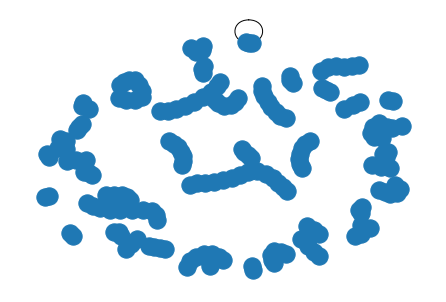

In [136]:
nx.draw(G)

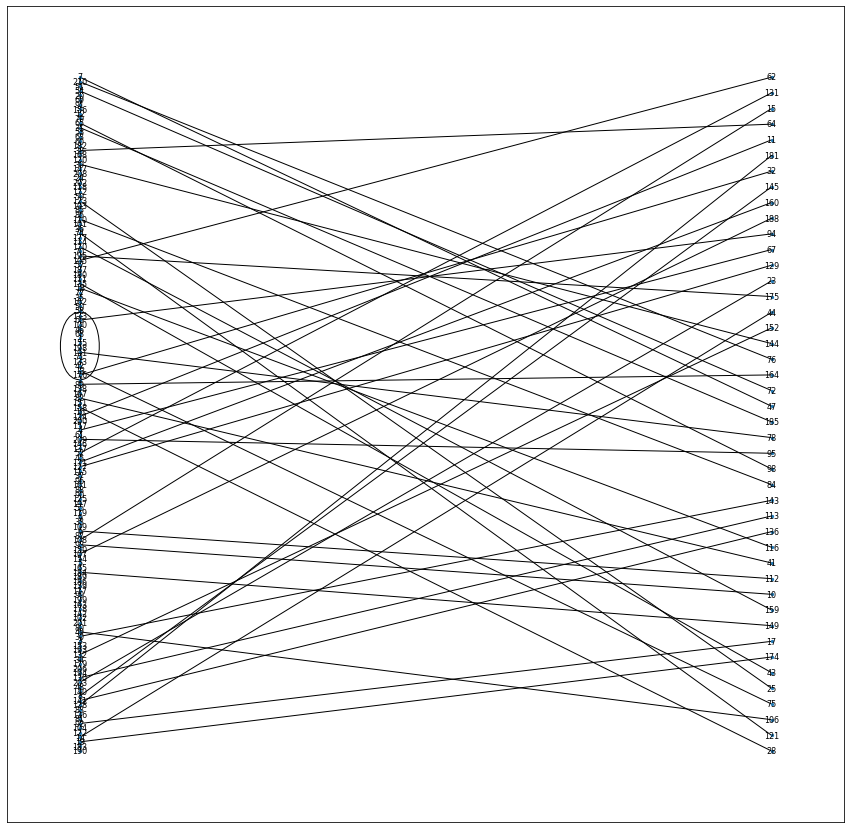

In [147]:
plt.figure(1,figsize=(15,15))
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, D), width = 1,node_size=5,font_size=8)

In [143]:
G.size()

148

In [142]:
G
plt.show()